In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from acquire import *
from prepare_nlp_josh import *
import env
import json
from requests import get
from json.decoder import JSONDecodeError
from bs4 import BeautifulSoup
import time
from tqdm import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
#You can also call the Porter by nltk.porter.PorterStemmer
from nltk.stem.snowball import EnglishStemmer


from nltk.stem import WordNetLemmatizer
from nltk.book import *
from nltk.text import Text


import env

#These download may need to be run for the NLTK library:

#nltk.download('omw-1.4')
#nltk.download("punkt")
#nltk.download("stopwords")
#nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')
#nltk.download("maxent_ne_chunker")
#nltk.download("words")
#nltk.download("book") #big download

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
links = get_links()

#When you get new links, delete this line.
#links.href = links.href.str[1:]



#Run this to get new data
df = get_repos(links.href)

#Run to save the data
#df.to_csv("origional_data.csv", index=False)

df.dropna(inplace=True)

df = clean_languages(df)

In [10]:
df['readme_clean'] = df['readme_contents'].apply(basic_clean)

In [11]:
df['readme_clean'].head()

repo
learn-co-students/simple-blackjack-cli-prework                simplified blackjack  procedural\n\n learning...
datamllab/rlcard                                              rlcard a toolkit for reinforcement learning i...
learn-co-students/simple-blackjack-cli-001-prework-web        simplified blackjack  procedural\n\n learning...
cocos-creator/tutorial-blackjack-deprecated                   21  cocos creator \n\n21 cocos creator  demo ...
learn-co-students/simple-blackjack-cli-online-web-prework     simplified blackjack  procedural\n\n learning...
Name: readme_clean, dtype: object

### Tokenize words

In [12]:
df['readme_clean'] = df['readme_clean'].apply(tokenized, tokenize_tool=2)

In [13]:
df['readme_clean'].head()

repo
learn-co-students/simple-blackjack-cli-prework               simplified blackjack procedural learning goals...
datamllab/rlcard                                             rlcard a toolkit for reinforcement learning in...
learn-co-students/simple-blackjack-cli-001-prework-web       simplified blackjack procedural learning goals...
cocos-creator/tutorial-blackjack-deprecated                  21 cocos creator 21 cocos creator demo cocos c...
learn-co-students/simple-blackjack-cli-online-web-prework    simplified blackjack procedural learning goals...
Name: readme_clean, dtype: object

### Lemm words

In [14]:
df['readme_lemm'] = df['readme_clean'].apply(lemmatized)

### Stem words

- Understemming: Two related words should be reduced to the same stem but aren't. (False negative)


- Overstemming: Two unrelated words are reduced to the same stem even though they shouldn't be. (False positive)

- Consider Snowball stemmer aka Porter2

In [15]:
df['readme_stem'] = df['readme_clean'].apply(stemmerize_tool, stemmer_type=3)

In [16]:
df['readme_stem'].head()

repo
learn-co-students/simple-blackjack-cli-prework               simplifi blackjack procedur learn goal util co...
datamllab/rlcard                                             rlcard a toolkit for reinforc learn in card ga...
learn-co-students/simple-blackjack-cli-001-prework-web       simplifi blackjack procedur learn goal util co...
cocos-creator/tutorial-blackjack-deprecated                  21 coco creator 21 coco creator demo coco crea...
learn-co-students/simple-blackjack-cli-online-web-prework    simplifi blackjack procedur learn goal util co...
Name: readme_stem, dtype: object

### Remove stopwords

In [17]:
df['readme_stem_no_swords'] = df['readme_stem'].apply(remove_stopwords)

In [18]:
df['readme_lemm_no_swords'] = df['readme_lemm'].apply(remove_stopwords)

### Split data

In [19]:
train, val, test = train_validate(df)

In [20]:
train.language.value_counts()

Ruby          94
JavaScript    19
Java          19
Python        17
C_based       14
Name: language, dtype: int64

### Explore Stems

In [21]:
big_rams_stem = []
for row in train['readme_stem_no_swords'].apply(ngrams_creator):
    big_rams_stem.extend(row)

In [22]:
bi_stem_series = pd.Series(big_rams_stem)

In [23]:
trig_rams_stem = []
for row in train['readme_stem_no_swords'].apply(ngrams_creator, n_grams=3):
    trig_rams_stem.extend(row)

In [24]:
tri_stem_series = pd.Series(trig_rams_stem)

In [25]:
bi_stem_series.value_counts().head()

(command, line)     1437
(card, total)       1024
(user, input)        856
(method, method)     838
(runner, method)     837
dtype: int64

In [26]:
tri_stem_series.value_counts().head()

(command, line, app)        594
(method, take, argument)    372
(deal, new, card)           280
(method, use, put)          279
(runner, method, runner)    279
dtype: int64

### Explore Lemms

In [27]:
top_25_readme_bigrams = bi_stem_series.value_counts().head(25)

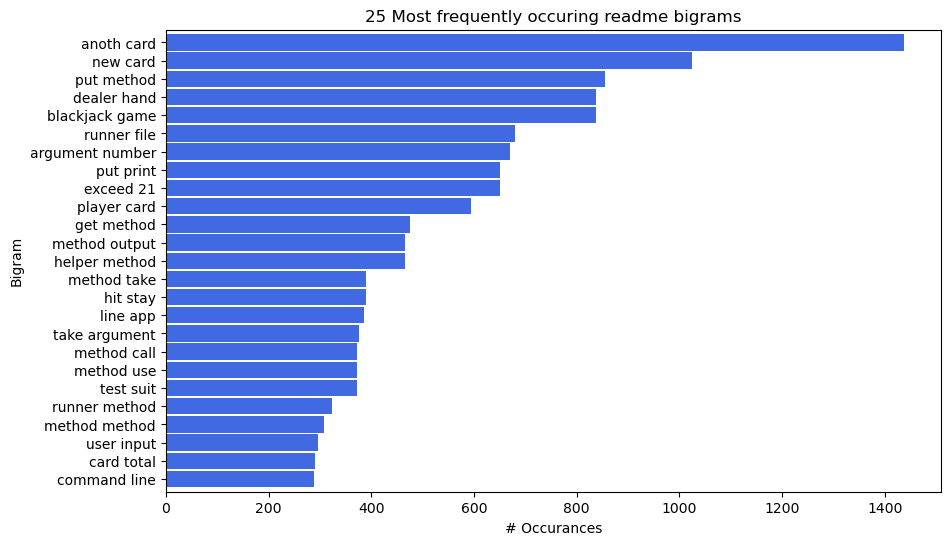

In [28]:
top_25_readme_bigrams.sort_values(ascending=True).plot.barh(color='royalblue', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring readme bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_25_readme_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [29]:
big_rams_lemm = []
for row in train['readme_lemm_no_swords'].apply(ngrams_creator):
    big_rams_lemm.extend(row)

In [30]:
bi_lemm_series = pd.Series(big_rams_lemm)

In [31]:
trig_rams_lemm = []
for row in train['readme_lemm_no_swords'].apply(ngrams_creator, n_grams=3):
    trig_rams_lemm.extend(row)

In [32]:
tri_lemm_series = pd.Series(trig_rams_lemm)

In [33]:
bi_lemm_series.value_counts().head()

(command, line)     1437
(card, total)       1024
(user, input)        856
(method, method)     838
(runner, method)     837
dtype: int64

In [34]:
tri_lemm_series.value_counts().head()

(command, line, app)          501
(method, take, argument)      372
(deal, new, card)             280
(command, line, interface)    279
(runner, method, runner)      279
dtype: int64

In [35]:
top_25_readme_trigrams= tri_lemm_series.value_counts().head(25)

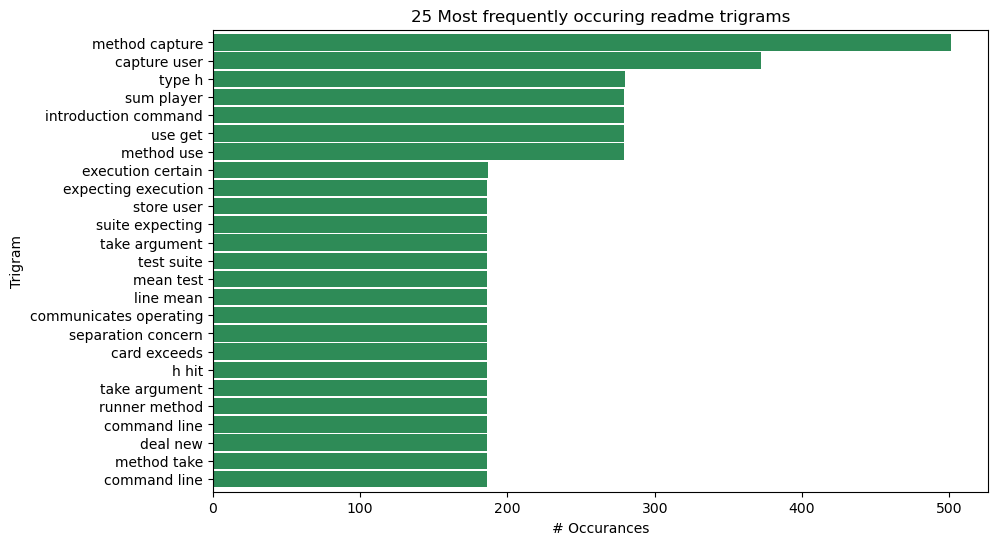

In [36]:
top_25_readme_trigrams.sort_values(ascending=True).plot.barh(color='seagreen', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring readme trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_25_readme_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [45]:
df['readme_length'] = df['readme_contents'].apply(len)

df

,language,readme_contents,readme_clean,readme_lemm,readme_stem,readme_stem_no_swords,readme_lemm_no_swords,readme_length
repo,,,,,,,,
learn-co-students/simple-blackjack-cli-prework,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...,simplified blackjack procedural learning goals...,simplified blackjack procedural learning goal ...,simplifi blackjack procedur learn goal util co...,simplifi blackjack procedur learn goal util co...,simplified blackjack procedural learning goal ...,12080
datamllab/rlcard,Python,# RLCard: A Toolkit for Reinforcement Learning...,rlcard a toolkit for reinforcement learning in...,rlcard a toolkit for reinforcement learning in...,rlcard a toolkit for reinforc learn in card ga...,rlcard toolkit reinforc learn card game img wi...,rlcard toolkit reinforcement learning card gam...,18918
learn-co-students/simple-blackjack-cli-001-prework-web,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...,simplified blackjack procedural learning goals...,simplified blackjack procedural learning goal ...,simplifi blackjack procedur learn goal util co...,simplifi blackjack procedur learn goal util co...,simplified blackjack procedural learning goal ...,12080
cocos-creator/tutorial-blackjack-deprecated,JavaScript,# 21点游戏 - Cocos Creator 制造\n\n「21点游戏」是 Cocos C...,21 cocos creator 21 cocos creator demo cocos c...,21 coco creator 21 coco creator demo coco crea...,21 coco creator 21 coco creator demo coco crea...,21 coco creator 21 coco creator demo coco crea...,21 coco creator 21 coco creator demo coco crea...,271
learn-co-students/simple-blackjack-cli-online-web-prework,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...,simplified blackjack procedural learning goals...,simplified blackjack procedural learning goal ...,simplifi blackjack procedur learn goal util co...,simplifi blackjack procedur learn goal util co...,simplified blackjack procedural learning goal ...,12080
...,...,...,...,...,...,...,...,...
perezjbryanSchoolWork/Java-Blackjack-Strategy-Simulation,Java,\nThis program simulates the game of Blackjack...,this program simulates the game of blackjack a...,this program simulates the game of blackjack a...,this program simul the game of blackjack and t...,program simul game blackjack best known way pl...,program simulates game blackjack best known wa...,348
TigerZen/Unity3D-BlackJack-Dapp,C_based,# Unity3D-BlackJack-Dapp\n\n教你使用Unity3D製作Dapp ...,unity3dblackjackdapp unity3ddapp part2solidity...,unity3dblackjackdapp unity3ddapp part2solidity...,unity3dblackjackdapp unity3ddapp part2solid bl...,unity3dblackjackdapp unity3ddapp part2solid bl...,unity3dblackjackdapp unity3ddapp part2solidity...,322
DEEBAZZ890/Blackjack-game,Python,# 21/Blackjack-game\n\nFrom a single deck of c...,21blackjackgame from a single deck of cards pi...,21blackjackgame from a single deck of card pic...,21blackjackgam from a singl deck of card pick ...,21blackjackgam singl deck card pick two player...,21blackjackgame single deck card pick two play...,1155


In [38]:
df.language.value_counts()

Ruby          213
Python         36
Java           36
JavaScript     35
C_based        22
Name: language, dtype: int64

In [39]:
df[df['language']=='Ruby']['readme_length'].sum()

2541688

In [40]:
df['readme_length'].sum()

2898150

In [41]:
avg_len_ruby =df[df['language']== 'Ruby']['readme_length'].mean()
avg_len_python= df[df['language']== 'Python']['readme_length'].mean()
avg_len_java= df[df['language']== 'Java']['readme_length'].mean()
avg_len_js = df[df['language']== 'JavaScript']['readme_length'].mean()
avg_len_c= df[df['language']== 'C_based']['readme_length'].mean()
avg_len_other = df[df['language']== 'Other']['readme_length'].mean()

In [42]:
avg_df=pd.DataFrame({'Ruby': [avg_len_ruby],
                    'Python': [avg_len_python],
                    'Java':[avg_len_java],
                    'JavaScript': [avg_len_js],
                    'C_based': [avg_len_c],
                    'Other':[avg_len_other]})

Text(0, 0.5, 'Average')

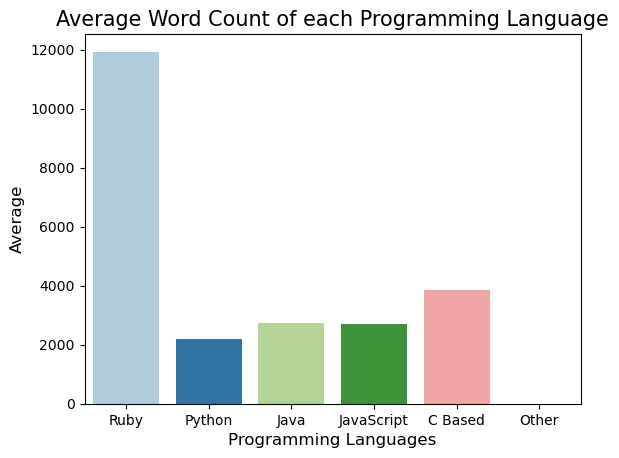

In [43]:
sns.barplot(avg_df, palette='Paired')
plt.title('Average Word Count of each Programming Language', fontsize=15)
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Ruby','Python', 'Java', 'JavaScript', 'C Based', 'Other'])
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Average', fontsize=12)

In [46]:
df

,language,readme_contents,readme_clean,readme_lemm,readme_stem,readme_stem_no_swords,readme_lemm_no_swords,readme_length
repo,,,,,,,,
learn-co-students/simple-blackjack-cli-prework,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...,simplified blackjack procedural learning goals...,simplified blackjack procedural learning goal ...,simplifi blackjack procedur learn goal util co...,simplifi blackjack procedur learn goal util co...,simplified blackjack procedural learning goal ...,12080
datamllab/rlcard,Python,# RLCard: A Toolkit for Reinforcement Learning...,rlcard a toolkit for reinforcement learning in...,rlcard a toolkit for reinforcement learning in...,rlcard a toolkit for reinforc learn in card ga...,rlcard toolkit reinforc learn card game img wi...,rlcard toolkit reinforcement learning card gam...,18918
learn-co-students/simple-blackjack-cli-001-prework-web,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...,simplified blackjack procedural learning goals...,simplified blackjack procedural learning goal ...,simplifi blackjack procedur learn goal util co...,simplifi blackjack procedur learn goal util co...,simplified blackjack procedural learning goal ...,12080
cocos-creator/tutorial-blackjack-deprecated,JavaScript,# 21点游戏 - Cocos Creator 制造\n\n「21点游戏」是 Cocos C...,21 cocos creator 21 cocos creator demo cocos c...,21 coco creator 21 coco creator demo coco crea...,21 coco creator 21 coco creator demo coco crea...,21 coco creator 21 coco creator demo coco crea...,21 coco creator 21 coco creator demo coco crea...,271
learn-co-students/simple-blackjack-cli-online-web-prework,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...,simplified blackjack procedural learning goals...,simplified blackjack procedural learning goal ...,simplifi blackjack procedur learn goal util co...,simplifi blackjack procedur learn goal util co...,simplified blackjack procedural learning goal ...,12080
...,...,...,...,...,...,...,...,...
perezjbryanSchoolWork/Java-Blackjack-Strategy-Simulation,Java,\nThis program simulates the game of Blackjack...,this program simulates the game of blackjack a...,this program simulates the game of blackjack a...,this program simul the game of blackjack and t...,program simul game blackjack best known way pl...,program simulates game blackjack best known wa...,348
TigerZen/Unity3D-BlackJack-Dapp,C_based,# Unity3D-BlackJack-Dapp\n\n教你使用Unity3D製作Dapp ...,unity3dblackjackdapp unity3ddapp part2solidity...,unity3dblackjackdapp unity3ddapp part2solidity...,unity3dblackjackdapp unity3ddapp part2solid bl...,unity3dblackjackdapp unity3ddapp part2solid bl...,unity3dblackjackdapp unity3ddapp part2solidity...,322
DEEBAZZ890/Blackjack-game,Python,# 21/Blackjack-game\n\nFrom a single deck of c...,21blackjackgame from a single deck of cards pi...,21blackjackgame from a single deck of card pic...,21blackjackgam from a singl deck of card pick ...,21blackjackgam singl deck card pick two player...,21blackjackgame single deck card pick two play...,1155
